<a href="https://www.kaggle.com/code/subhajeetdas/nvidia-amd-intel-asus-msi-share-price-predict?scriptVersionId=126539163" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

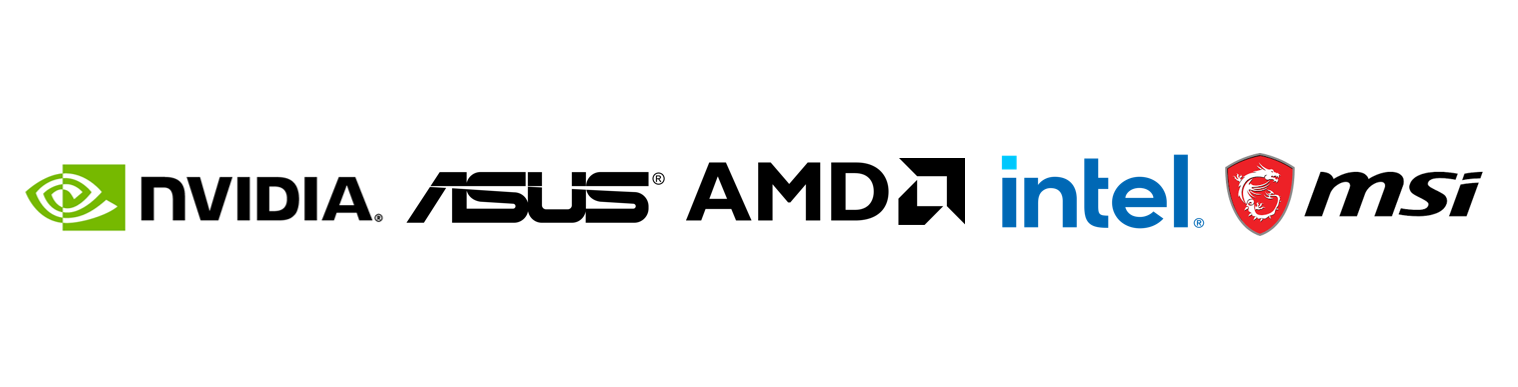

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import warnings
warnings.filterwarnings('ignore')

/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/MSI (1962-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/Intel (1980-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/ASUS (2000-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/NVIDIA (1999-2023).csv
/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/AMD (1980-2023).csv


# Loading Data

In [2]:
amd_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/AMD (1980-2023).csv")
asus_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/ASUS (2000-2023).csv")
intel_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/Intel (1980-2023).csv")
msi_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/MSI (1962-2023).csv")
nvidia_df = pd.read_csv("/kaggle/input/nvidia-amd-intel-asus-msi-share-prices/NVIDIA (1999-2023).csv")

# Data Information, Cleaning & Visualization

## AMD

In [3]:
amd_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.000000,3.125000,2.937500,3.031250,3.031250,727200
1,1980-03-19,0.000000,3.083333,3.020833,3.041667,3.041667,295200
2,1980-03-20,0.000000,3.062500,3.010417,3.010417,3.010417,159600
3,1980-03-21,0.000000,3.020833,2.906250,2.916667,2.916667,130800
4,1980-03-24,0.000000,2.916667,2.635417,2.666667,2.666667,436800
...,...,...,...,...,...,...,...
10854,2023-04-05,94.349998,94.500000,91.360001,92.559998,92.559998,52979300
10855,2023-04-06,91.470001,92.910004,90.620003,92.470001,92.470001,47778400
10856,2023-04-10,91.320000,95.800003,91.019997,95.480003,95.480003,52536300
10857,2023-04-11,96.059998,96.070000,92.690002,94.029999,94.029999,51935800


In [4]:
amd_viz = amd_df.copy()

In [5]:
amd_df.size

76013

In [6]:
amd_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
amd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10859 non-null  object 
 1   Open       10859 non-null  float64
 2   High       10859 non-null  float64
 3   Low        10859 non-null  float64
 4   Close      10859 non-null  float64
 5   Adj Close  10859 non-null  float64
 6   Volume     10859 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 594.0+ KB


In [8]:
amd_df.shape

(10859, 7)

In [9]:
amd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10859.0,1.635096e+01,2.239617e+01,0.00,4.937500e+00,9.810000e+00,1.600000e+01,1.632800e+02
High,10859.0,1.701071e+01,2.266873e+01,1.69,5.405000e+00,1.000000e+01,1.625000e+01,1.644600e+02
Low,10859.0,1.628052e+01,2.170581e+01,1.61,5.120000e+00,9.562500e+00,1.568750e+01,1.561000e+02
Close,10859.0,1.664808e+01,2.219636e+01,1.62,5.265000e+00,9.760000e+00,1.600000e+01,1.619100e+02
Adj Close,10859.0,1.664808e+01,2.219636e+01,1.62,5.265000e+00,9.760000e+00,1.600000e+01,1.619100e+02
Volume,10859.0,1.819320e+07,2.794779e+07,0.00,1.216500e+06,6.745600e+06,2.242935e+07,3.250584e+08


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

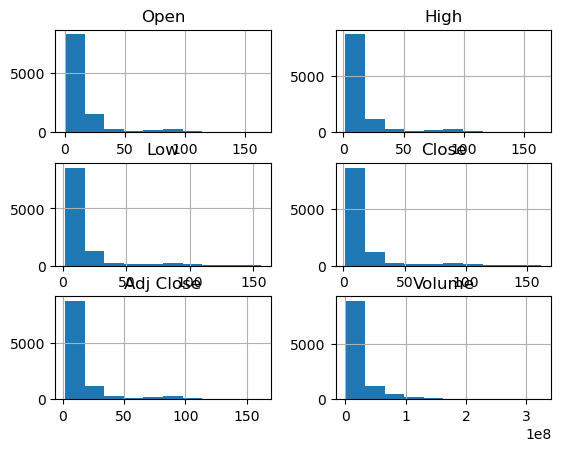

In [10]:
amd_df.hist()

## ASUS

In [11]:
asus_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-05,438.747223,446.535675,436.151154,438.747223,93.584663,6.106176e+09
1,2000-01-06,440.045380,447.833862,436.151154,437.449310,93.307838,6.545984e+09
2,2000-01-07,432.256927,433.555084,425.766632,428.362701,91.369652,4.764317e+09
3,2000-01-10,434.853271,454.324158,434.853271,450.429901,96.076584,1.199988e+10
4,2000-01-11,463.410767,463.410767,442.641449,443.939606,94.692215,1.423350e+10
...,...,...,...,...,...,...,...
5804,2023-04-06,269.500000,270.500000,268.500000,270.500000,270.500000,1.635045e+06
5805,2023-04-07,271.500000,272.000000,270.000000,270.000000,270.000000,5.802490e+05
5806,2023-04-10,271.500000,272.000000,270.000000,271.000000,271.000000,5.541680e+05
5807,2023-04-11,271.000000,274.500000,270.500000,273.500000,273.500000,1.344270e+06


In [12]:
asus_viz = asus_df.copy()

In [13]:
asus_df.size

40663

In [14]:
asus_df.isnull().sum()

Date           0
Open         123
High         123
Low          123
Close        123
Adj Close    123
Volume       123
dtype: int64

In [15]:
asus_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5809 entries, 0 to 5808
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5809 non-null   object 
 1   Open       5686 non-null   float64
 2   High       5686 non-null   float64
 3   Low        5686 non-null   float64
 4   Close      5686 non-null   float64
 5   Adj Close  5686 non-null   float64
 6   Volume     5686 non-null   float64
dtypes: float64(6), object(1)
memory usage: 317.8+ KB


In [16]:
asus_df.dropna(inplace = True)

In [17]:
asus_df.shape

(5686, 7)

In [18]:
asus_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,5686.0,2.903879e+02,7.633665e+01,127.106941,2.341066e+02,2.775000e+02,3.310057e+02,5.676674e+02
High,5686.0,2.935721e+02,7.712235e+01,130.196335,2.365000e+02,2.800000e+02,3.353157e+02,5.751041e+02
Low,5686.0,2.869477e+02,7.530864e+01,127.106941,2.315000e+02,2.750000e+02,3.270000e+02,5.478362e+02
Close,5686.0,2.901330e+02,7.597886e+01,130.196335,2.340000e+02,2.775000e+02,3.310076e+02,5.651885e+02
Adj Close,5686.0,1.332444e+02,6.761491e+01,30.318747,7.951987e+01,1.252528e+02,1.706543e+02,3.304028e+02
Volume,5686.0,1.027367e+09,2.186379e+09,0.000000,1.696933e+06,3.201000e+06,1.125660e+09,2.833812e+10


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

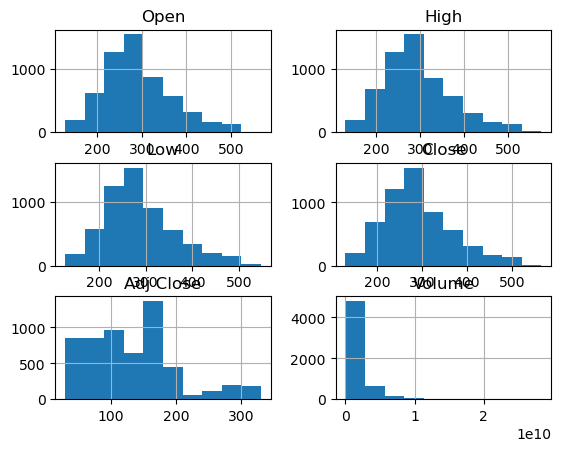

In [19]:
asus_df.hist()

## INTEL

In [20]:
intel_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-18,0.325521,0.328125,0.322917,0.322917,0.184470,17068800
1,1980-03-19,0.330729,0.335938,0.330729,0.330729,0.188933,18508800
2,1980-03-20,0.330729,0.334635,0.329427,0.329427,0.188189,11174400
3,1980-03-21,0.322917,0.322917,0.317708,0.317708,0.181494,12172800
4,1980-03-24,0.316406,0.316406,0.311198,0.311198,0.177775,8966400
...,...,...,...,...,...,...,...
10854,2023-04-05,32.799999,32.990002,32.340000,32.830002,32.830002,39615700
10855,2023-04-06,32.599998,33.000000,32.459999,32.810001,32.810001,28551900
10856,2023-04-10,32.599998,32.759998,32.200001,32.520000,32.520000,30534400
10857,2023-04-11,32.660000,33.110001,32.320000,32.349998,32.349998,27059100


In [21]:
intel_viz = intel_df.copy()

In [22]:
intel_df.size

76013

In [23]:
intel_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [24]:
intel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10859 entries, 0 to 10858
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10859 non-null  object 
 1   Open       10859 non-null  float64
 2   High       10859 non-null  float64
 3   Low        10859 non-null  float64
 4   Close      10859 non-null  float64
 5   Adj Close  10859 non-null  float64
 6   Volume     10859 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 594.0+ KB


In [25]:
intel_df.shape

(10859, 7)

In [26]:
intel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,10859.0,1.983411e+01,1.751487e+01,0.218750,1.328125e+00,2.027734e+01,2.998000e+01,7.562500e+01
High,10859.0,2.010510e+01,1.775695e+01,0.218750,1.343750e+00,2.056250e+01,3.042500e+01,7.582812e+01
Low,10859.0,1.956560e+01,1.727888e+01,0.216146,1.304688e+00,2.001000e+01,2.952000e+01,7.362500e+01
Close,10859.0,1.983353e+01,1.751430e+01,0.216146,1.328125e+00,2.028000e+01,2.995000e+01,7.487500e+01
Adj Close,10859.0,1.463638e+01,1.482980e+01,0.123476,7.587070e-01,1.266580e+01,1.980832e+01,6.360819e+01
Volume,10859.0,5.056303e+07,3.487815e+07,0.000000,2.708505e+07,4.460160e+07,6.477205e+07,5.677088e+08


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

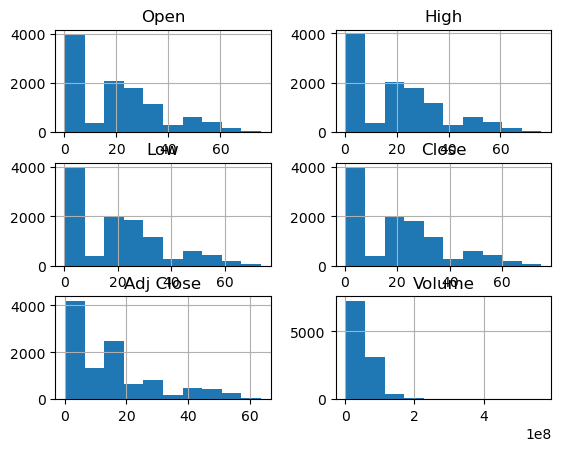

In [27]:
intel_df.hist()

## MSI

In [28]:
msi_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1962-01-03,0.000000,1.444702,1.427952,1.436327,0.632343,77611
1,1962-01-04,0.000000,1.438421,1.411202,1.423765,0.626812,59701
2,1962-01-05,0.000000,1.432140,1.394452,1.415390,0.623125,107462
3,1962-01-08,0.000000,1.432140,1.390264,1.390264,0.612063,89551
4,1962-01-09,0.000000,1.402827,1.356764,1.356764,0.597315,83581
...,...,...,...,...,...,...,...
15419,2023-04-05,286.010010,286.209991,283.079987,286.140015,286.140015,1043300
15420,2023-04-06,283.950012,284.559998,281.940002,283.459991,283.459991,795100
15421,2023-04-10,283.000000,283.940002,281.420013,283.619995,283.619995,590900
15422,2023-04-11,283.000000,284.739990,282.559998,283.500000,283.500000,625100


In [29]:
msi_viz = msi_df.copy()

In [30]:
msi_df.size

107968

In [31]:
msi_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [32]:
msi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15424 entries, 0 to 15423
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       15424 non-null  object 
 1   Open       15424 non-null  float64
 2   High       15424 non-null  float64
 3   Low        15424 non-null  float64
 4   Close      15424 non-null  float64
 5   Adj Close  15424 non-null  float64
 6   Volume     15424 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 843.6+ KB


In [33]:
msi_df.shape

(15424, 7)

In [34]:
msi_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,15424.0,4.497749e+01,5.488317e+01,0.000000,3.768789,2.351724e+01,6.723520e+01,2.862100e+02
High,15424.0,4.641262e+01,5.484100e+01,0.866821,5.175804,2.385644e+01,6.798895e+01,2.874200e+02
Low,15424.0,4.522475e+01,5.357820e+01,0.808196,5.025052,2.323006e+01,6.648608e+01,2.837400e+02
Close,15424.0,4.582540e+01,5.422240e+01,0.845884,5.100428,2.355493e+01,6.723520e+01,2.861400e+02
Adj Close,15424.0,3.765278e+01,5.114492e+01,0.376771,2.625478,1.625914e+01,5.226976e+01,2.861400e+02
Volume,15424.0,1.997183e+06,2.347513e+06,0.000000,505950.000000,1.294556e+06,2.627212e+06,4.717163e+07


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

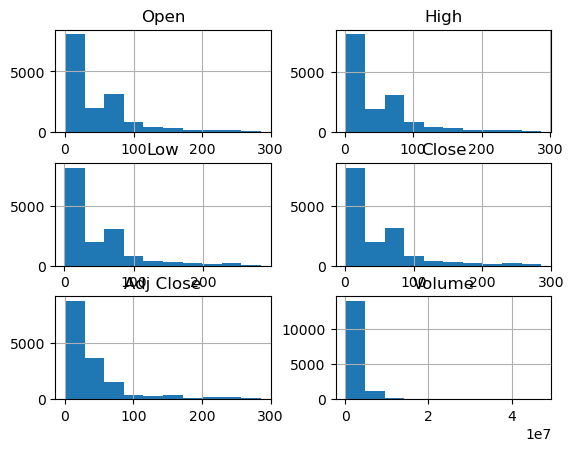

In [35]:
msi_df.hist()

## NVIDIA

In [36]:
nvidia_df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415786,51048000
1,1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383527,34320000
2,1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382332,24436800
3,1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381137,22752000
4,1999-01-29,0.415365,0.416667,0.395833,0.395833,0.363215,24403200
...,...,...,...,...,...,...,...
6089,2023-04-05,268.290009,269.980011,263.950012,268.809998,268.809998,51501500
6090,2023-04-06,265.839996,270.799988,264.269989,270.369995,270.369995,39765400
6091,2023-04-10,268.230011,276.209991,266.690002,275.790009,275.790009,39527900
6092,2023-04-11,277.239990,277.899994,271.260010,271.690002,271.690002,31437800


In [37]:
nvidia_viz = nvidia_df.copy()

In [38]:
nvidia_df.size

42658

In [39]:
nvidia_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [40]:
nvidia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6094 entries, 0 to 6093
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6094 non-null   object 
 1   Open       6094 non-null   float64
 2   High       6094 non-null   float64
 3   Low        6094 non-null   float64
 4   Close      6094 non-null   float64
 5   Adj Close  6094 non-null   float64
 6   Volume     6094 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 333.4+ KB


In [41]:
nvidia_df.shape

(6094, 7)

In [42]:
nvidia_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,6094.0,3.098737e+01,5.986201e+01,3.489580e-01,2.671094e+00,4.285000e+00,2.669000e+01,3.351700e+02
High,6094.0,3.158537e+01,6.108982e+01,3.554690e-01,2.750000e+00,4.377500e+00,2.719813e+01,3.464700e+02
Low,6094.0,3.036914e+01,5.856477e+01,3.333330e-01,2.598027e+00,4.210000e+00,2.640500e+01,3.203600e+02
Close,6094.0,3.100383e+01,5.988140e+01,3.411460e-01,2.670208e+00,4.290000e+00,2.681813e+01,3.337600e+02
Adj Close,6094.0,3.074315e+01,5.988244e+01,3.130340e-01,2.450174e+00,3.946429e+00,2.644003e+01,3.333508e+02
Volume,6094.0,6.134634e+07,4.399760e+07,1.968000e+06,3.440110e+07,5.151250e+07,7.462690e+07,9.230856e+08


array([[<AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>],
       [<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Volume'}>]], dtype=object)

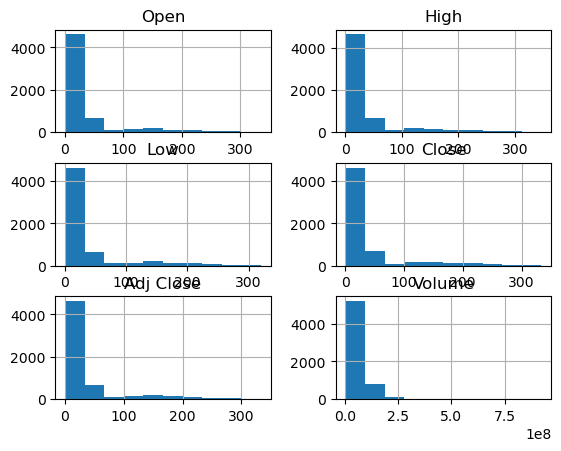

In [43]:
nvidia_df.hist()

# Train & Test Splitting the Data

In [44]:
amd_train, amd_test = train_test_split(amd_df, test_size = 0.2, random_state=0)
asus_train, asus_test = train_test_split(asus_df, test_size = 0.2, random_state=0)
intel_train, intel_test = train_test_split(intel_df, test_size = 0.2, random_state=0)
msi_train, msi_test = train_test_split(msi_df, test_size = 0.2, random_state=0)
nvidia_train, nvidia_test = train_test_split(nvidia_df, test_size = 0.2, random_state=0)

In [45]:
amd_test_pred = amd_test.copy()
asus_test_pred = asus_test.copy()
intel_test_pred = intel_test.copy()
msi_test_pred = msi_test.copy()
nvidia_test_pred = nvidia_test.copy()

In [46]:
x_col = ['Open', 'High', 'Low', 'Volume']

In [47]:
x_train_amd = amd_train[x_col].values
x_test_amd = amd_test[x_col].values

In [48]:
x_train_asus = asus_train[x_col]
x_test_asus = asus_test[x_col]

In [49]:
x_train_intel = intel_train[x_col]
x_test_intel = intel_test[x_col]

In [50]:
x_train_msi = msi_train[x_col]
x_test_msi = msi_test[x_col]

In [51]:
x_train_nvidia = nvidia_train[x_col]
x_test_nvidia = nvidia_test[x_col]

In [52]:
y_train_amd = amd_train['Close'].values
y_train_asus = asus_train['Close'].values
y_train_intel = intel_train['Close'].values
y_train_msi = msi_train['Close'].values
y_train_nvidia = nvidia_train['Close'].values

In [53]:
y_test_amd = amd_test['Close'].values
y_test_asus = asus_test['Close'].values
y_test_intel = intel_test['Close'].values
y_test_msi = msi_test['Close'].values
y_test_nvidia = nvidia_test['Close'].values

# Function to Measure Performance

In [54]:
def perform(y_test, y_pred):
    print("MSE",round(mean_squared_error(y_test,y_pred), 3))
    print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
    print("MSLE",round(mean_squared_log_error(y_test,y_pred)), 3)
    print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
    print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
    print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

# Linear Regression for AMD

In [55]:
model_lr_amd = LinearRegression()
model_lr_amd.fit(x_train_amd, y_train_amd)

LinearRegression()

In [56]:
y_pred_amd = model_lr_amd.predict(x_test_amd)

In [57]:
perform(y_test_amd, y_pred_amd)

MSE 0.171
RMSE 0.413
MSLE 0 3
MAE 0.214
MAPE 0.017
R2 Score :  1.0


# Linear Regression for ASUS

In [58]:
model_lr_asus = LinearRegression()
model_lr_asus.fit(x_train_asus, y_train_asus)

LinearRegression()

In [59]:
y_pred_asus = model_lr_asus.predict(x_test_asus)

In [60]:
perform(y_test_asus, y_pred_asus)

MSE 5.872
RMSE 2.423
MSLE 0 3
MAE 1.693
MAPE 0.006
R2 Score :  0.999


# Linear regression for INTEL

In [61]:
model_lr_intel = LinearRegression()
model_lr_intel.fit(x_train_intel, y_train_intel)

LinearRegression()

In [62]:
y_pred_intel = model_lr_intel.predict(x_test_intel)

In [63]:
perform(y_test_intel, y_pred_intel)

MSE 0.061
RMSE 0.247
MSLE 0 3
MAE 0.126
MAPE 0.007
R2 Score :  1.0


# Linear Regression for MSI

In [64]:
model_lr_msi = LinearRegression()
model_lr_msi.fit(x_train_msi, y_train_msi)

LinearRegression()

In [65]:
y_pred_msi = model_lr_msi.predict(x_test_msi)

In [66]:
perform(y_test_msi, y_pred_msi)

MSE 0.375
RMSE 0.613
MSLE 0 3
MAE 0.375
MAPE 0.023
R2 Score :  1.0


# Linear Regression for NVIDIA

In [67]:
model_lr_nvidia = LinearRegression()
model_lr_nvidia.fit(x_train_nvidia, y_train_nvidia)

LinearRegression()

In [68]:
y_pred_nvidia = model_lr_nvidia.predict(x_test_nvidia)

In [69]:
perform(y_test_nvidia, y_pred_nvidia)

MSE 0.775
RMSE 0.881
MSLE 0 3
MAE 0.264
MAPE 0.009
R2 Score :  1.0


# Model Visualization

In [70]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    #setting up X-axis tick color to white
    ax.tick_params(axis='y', colors='white')    #setting up Y-axis tick color to white

    ax.spines['left'].set_color('white')        #setting up Y-axis spine color to white
    #ax.spines['right'].set_color('white')
    #ax.spines['top'].set_color('white')
    ax.spines['bottom'].set_color('white')      #setting up X-axis spine color to white

    ax.set_facecolor("black")                   # Setting the background color of the plot using set_facecolor() method

## AMD

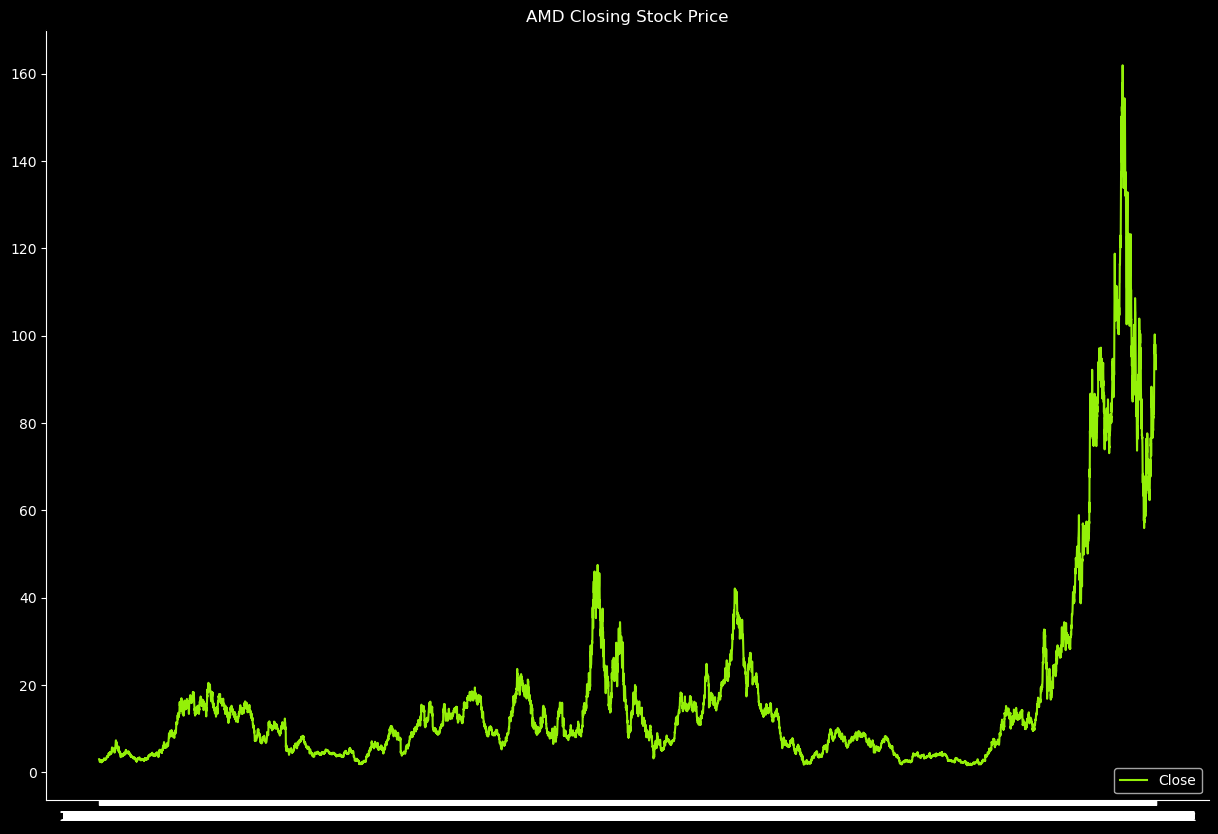

In [71]:
style()

plt.title('AMD Closing Stock Price', color="white")
plt.plot(amd_viz.Date, amd_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

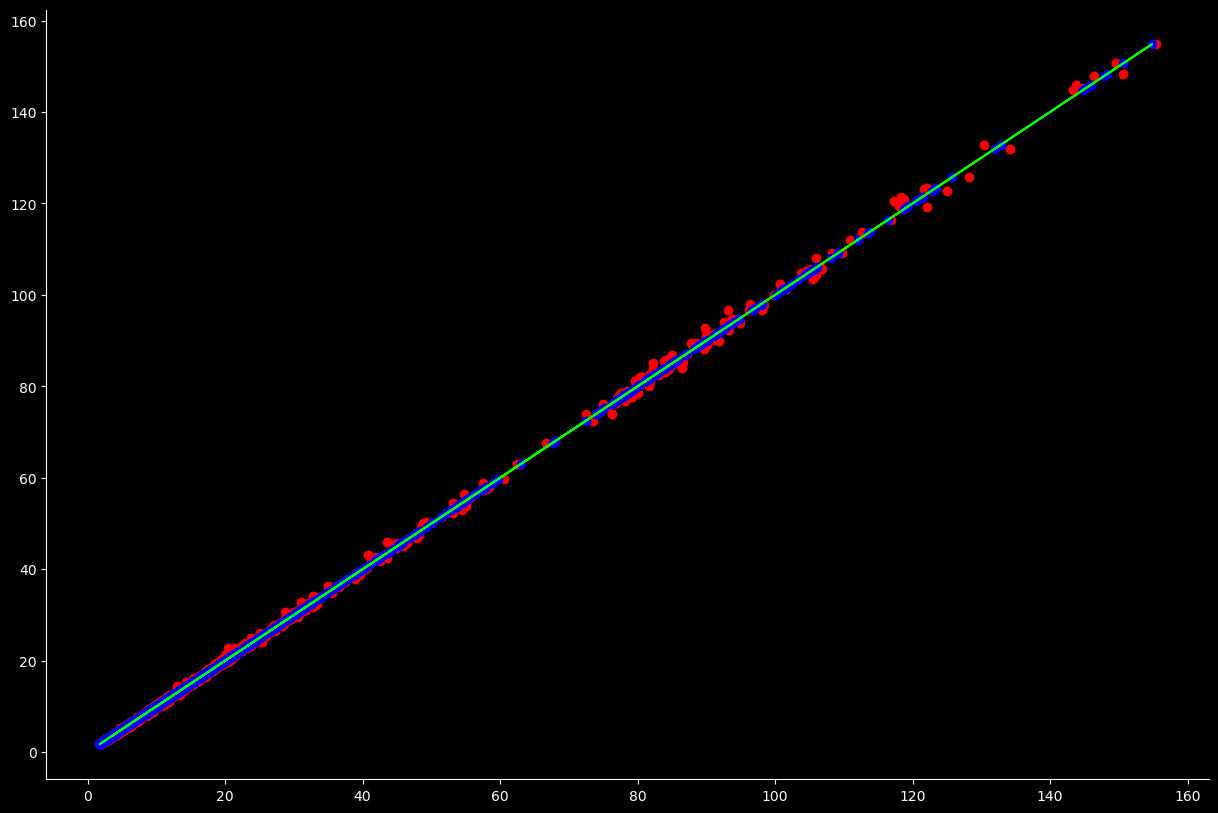

In [72]:
style()

plt.scatter(y_pred_amd, y_test_amd, color='red', marker='o')
plt.scatter(y_test_amd, y_test_amd, color='blue')
plt.plot(y_test_amd, y_test_amd, color='lime')

In [73]:
amd_test_pred['Close_Prediction'] = y_pred_amd
amd_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
8709,2014-09-26,3.630000,3.670000,3.600000,3.600000,3.600000,12976300,3.607484
2124,1988-08-11,6.125000,6.125000,5.875000,6.000000,6.000000,1706400,5.953998
159,1980-10-31,0.000000,4.791667,4.520833,4.791667,4.791667,664800,5.001777
10369,2021-05-03,81.970001,82.000000,78.459999,78.550003,78.550003,66323300,80.094965
1478,1986-01-22,14.375000,14.625000,13.937500,14.000000,14.000000,692600,14.236955
...,...,...,...,...,...,...,...,...
2055,1988-05-04,7.187500,7.250000,7.062500,7.250000,7.250000,668600,7.117370
4688,1998-10-02,9.093750,9.406250,8.906250,9.375000,9.375000,3671600,9.126805
10205,2020-09-04,81.449997,84.389999,76.330002,82.010002,82.010002,82267800,80.283303
2952,1991-11-19,6.437500,6.437500,6.000000,6.250000,6.250000,3037600,6.165731


In [74]:
amd_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2172.0,16.542308,22.131326,1.700000,5.433125,9.811250,15.750000,154.809998
Close_Prediction,2172.0,16.527938,22.072435,1.665844,5.491328,9.745792,15.770707,155.415291


### AMD Actual Close Price vs. Predicted Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13482328"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

## ASUS

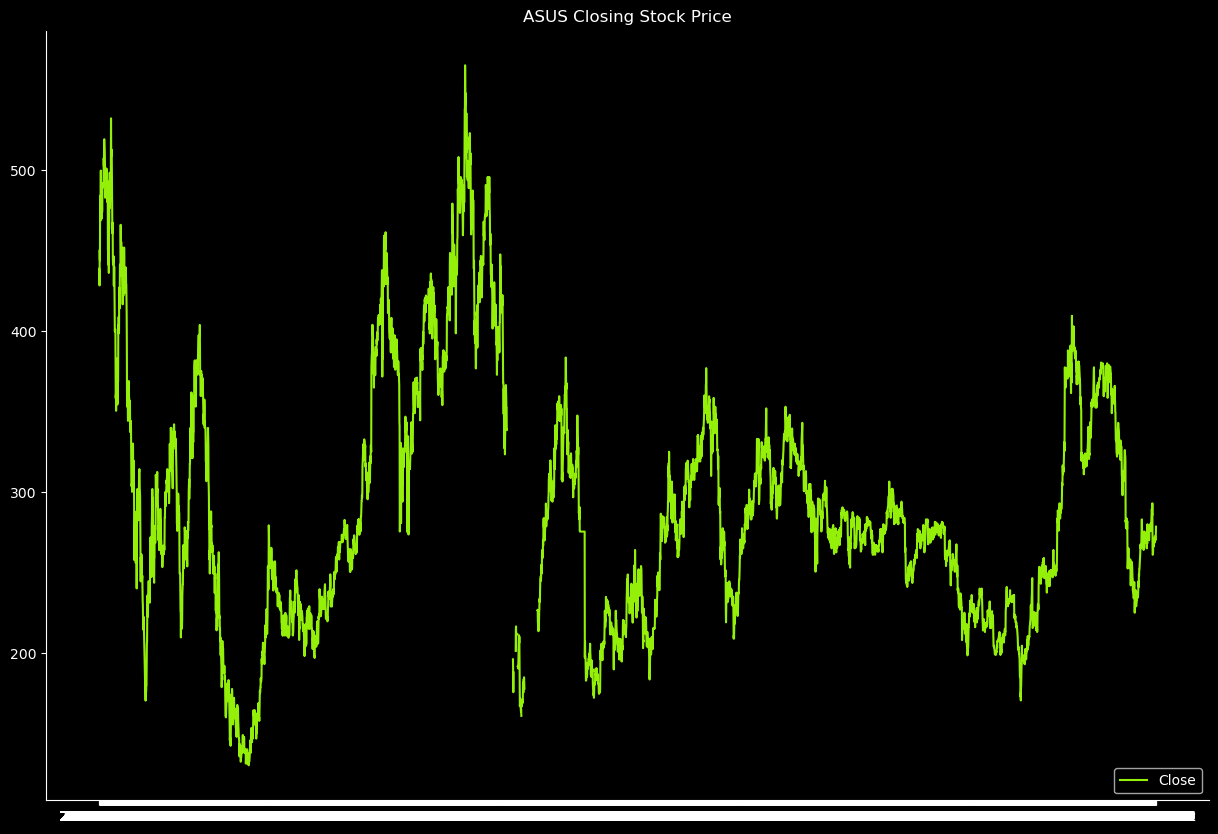

In [75]:
style()

plt.title('ASUS Closing Stock Price', color="white")
plt.plot(asus_viz.Date, asus_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

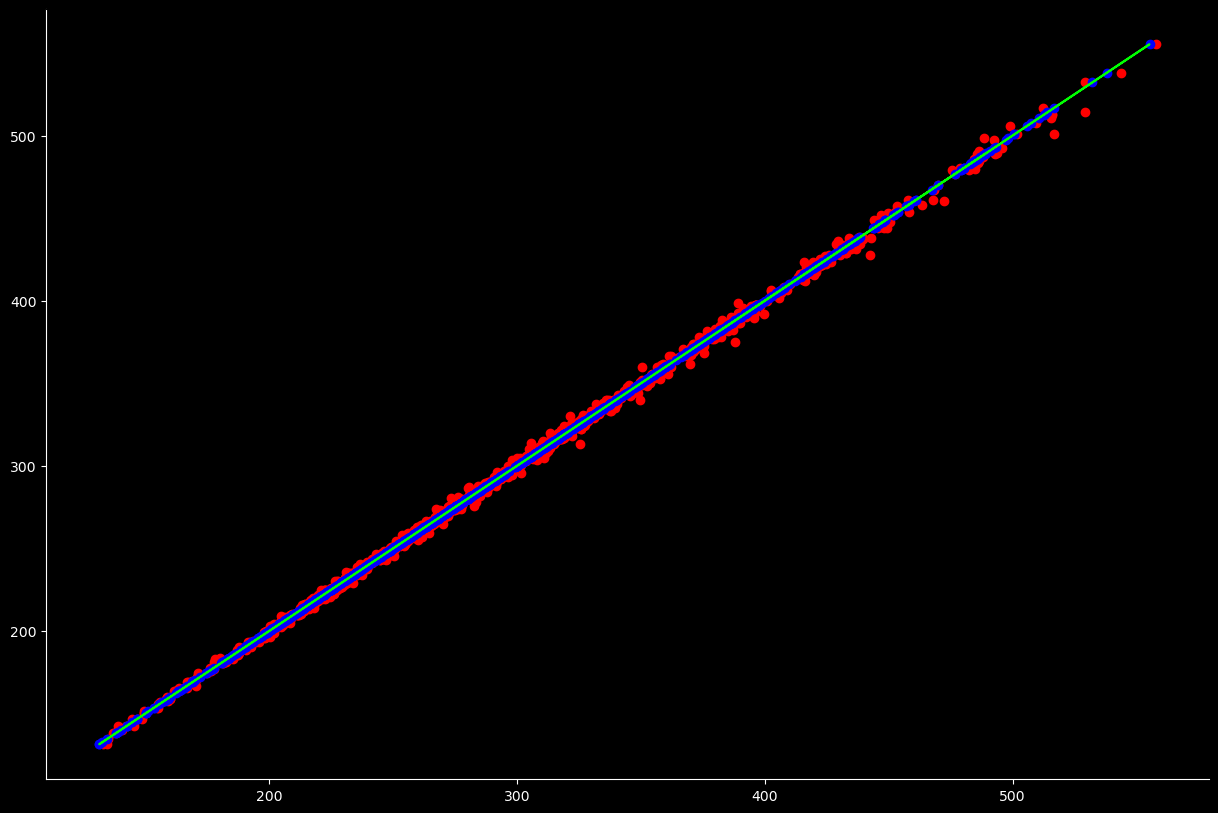

In [76]:
style()

plt.scatter(y_pred_asus, y_test_asus, color='red', marker='o')
plt.scatter(y_test_asus, y_test_asus, color='blue')
plt.plot(y_test_asus, y_test_asus, color='lime')

In [77]:
asus_test_pred['Close_Prediction'] = y_pred_asus
asus_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
1995,2007-10-08,493.796326,494.292084,483.384949,488.838531,124.918144,3.190733e+06,485.457880
5728,2022-12-01,270.000000,273.500000,267.000000,271.500000,271.500000,2.959974e+06,270.523072
3737,2014-10-16,289.000000,296.500000,288.000000,293.500000,164.030930,3.547000e+06,294.358564
29,2000-02-15,519.227600,523.121826,507.544952,516.631531,110.197418,5.626966e+09,512.159767
4217,2016-09-27,277.500000,277.500000,277.500000,277.500000,174.747482,0.000000e+00,277.284754
...,...,...,...,...,...,...,...,...
3702,2014-08-26,302.000000,302.500000,300.000000,300.000000,167.663666,1.349000e+06,300.623975
2765,2010-11-08,201.639343,202.049179,195.901642,195.901642,85.619843,3.378180e+06,197.707022
1586,2006-02-10,433.538727,433.538727,424.524536,427.529266,105.974281,1.825292e+06,426.029356
552,2002-02-15,397.209106,397.209106,397.209106,397.209106,87.756126,0.000000e+00,396.598732


In [78]:
asus_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1138.0,291.790730,78.975568,131.299683,232.000000,278.500000,334.470711,555.272949
Close_Prediction,1138.0,291.827443,79.168032,132.660958,231.580622,277.387644,334.366024,557.890190


### ASUS Actual Close Price vs Predicted Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13482805"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

## INTEL

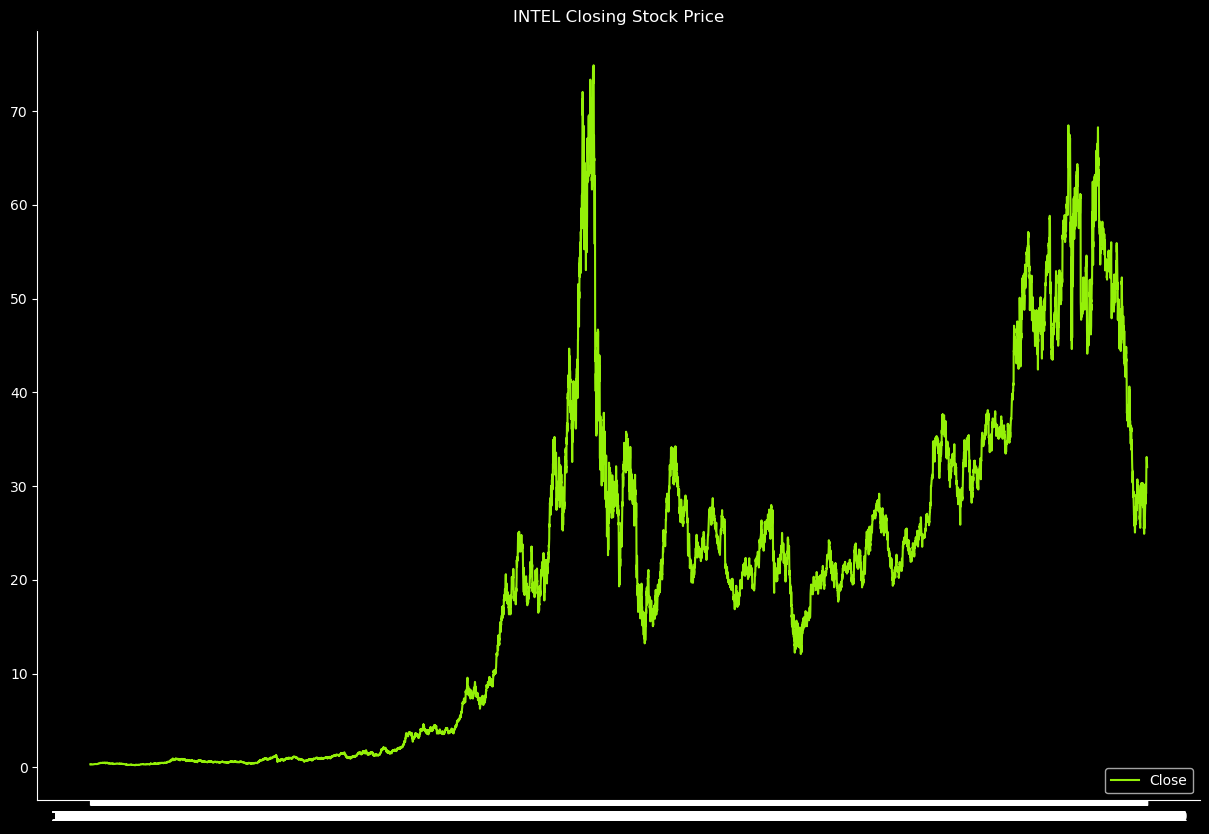

In [79]:
style()

plt.title('INTEL Closing Stock Price', color="white")
plt.plot(intel_viz.Date, intel_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

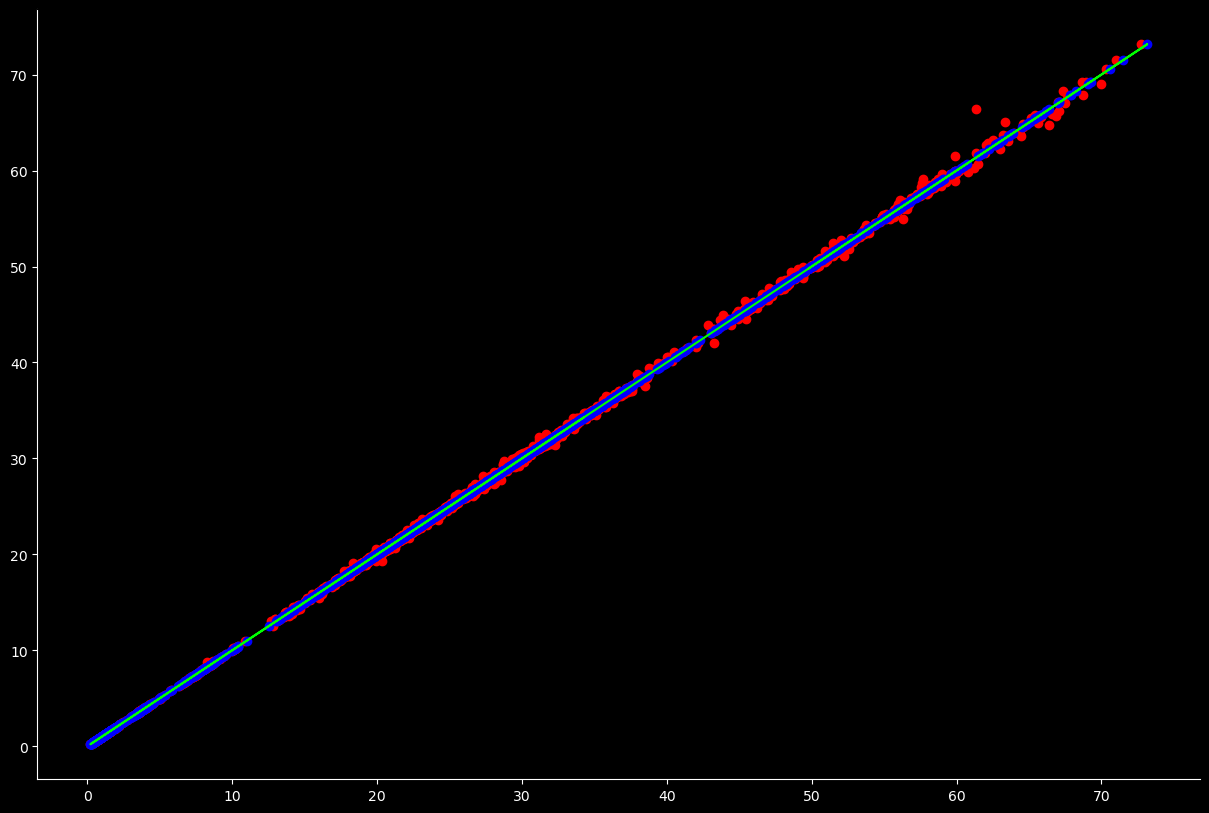

In [80]:
style()

plt.scatter(y_pred_intel, y_test_intel, color='red', marker='o')
plt.scatter(y_test_intel, y_test_intel, color='blue')
plt.plot(y_test_intel, y_test_intel, color='lime')

In [81]:
intel_test_pred['Close_Prediction'] = y_pred_intel
intel_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
8709,2014-09-26,34.259998,34.360001,33.630001,34.259998,26.755447,25882300,33.826729
2124,1988-08-11,0.992188,1.011719,0.984375,1.007813,0.575725,68921600,1.008904
159,1980-10-31,0.437500,0.440104,0.437500,0.437500,0.249927,16579200,0.439479
10369,2021-05-03,57.860001,57.880001,56.840000,57.259998,53.357815,22281700,57.053165
1478,1986-01-22,0.619792,0.630208,0.614583,0.614583,0.351088,18484800,0.623625
...,...,...,...,...,...,...,...,...
2055,1988-05-04,1.015625,1.039063,1.000000,1.007813,0.575725,52480000,1.025944
4688,1998-10-02,20.703125,21.250000,20.312500,20.968750,12.177602,59275600,20.804814
10205,2020-09-04,50.529999,51.230000,49.490002,50.080002,46.050610,43318400,50.213023
2952,1991-11-19,1.304688,1.304688,1.265625,1.304688,0.745318,49120000,1.276729


In [82]:
intel_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,2172.0,20.283849,17.569062,0.216146,1.484375,20.635312,30.500000,73.156250
Close_Prediction,2172.0,20.275967,17.558136,0.215186,1.486603,20.703157,30.377781,72.750339


### INTEL Actual Close Price vs Predicted Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13483241"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

## MSI

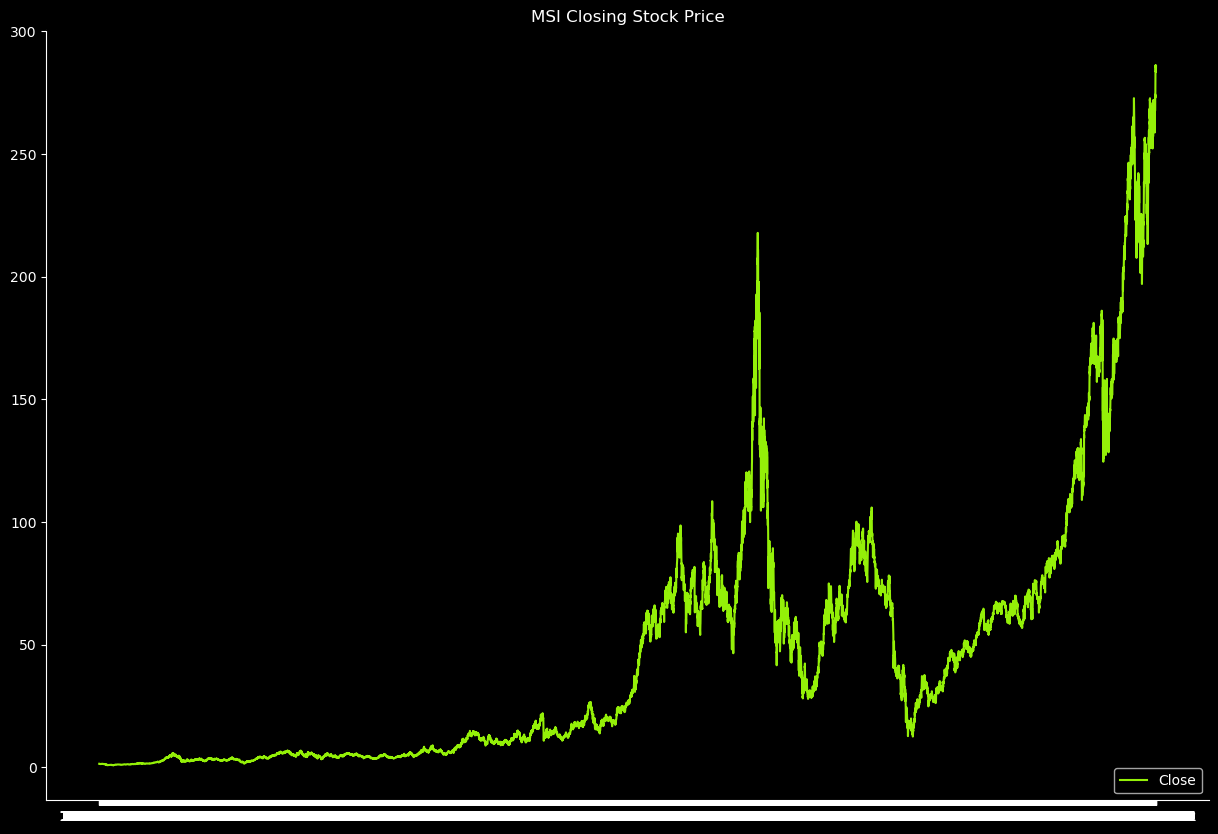

In [83]:
style()

plt.title('MSI Closing Stock Price', color="white")
plt.plot(msi_viz.Date, msi_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

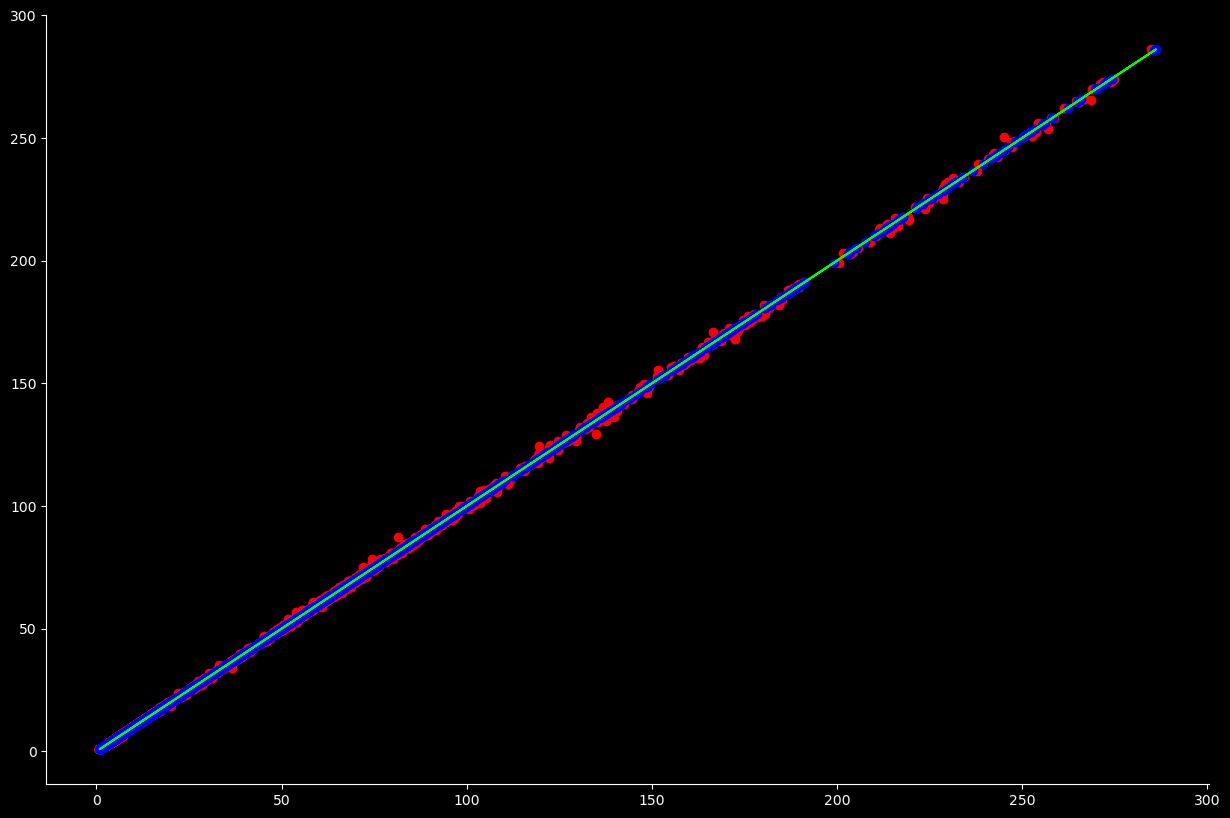

In [84]:
style()

plt.scatter(y_pred_msi, y_test_msi, color='red', marker='o')
plt.scatter(y_test_msi, y_test_msi, color='blue')
plt.plot(y_test_msi, y_test_msi, color='lime')

In [85]:
msi_test_pred['Close_Prediction'] = y_pred_msi
msi_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
6488,1987-10-26,11.909373,11.947061,10.854113,10.854113,6.973376,3890839,11.225028
7053,1990-01-19,17.939436,17.939436,17.298742,17.298742,11.485564,2654699,17.461106
14633,2020-02-21,185.110001,185.820007,183.750000,185.270004,176.634430,965300,184.909543
9172,1998-06-09,62.712650,63.240280,62.260395,62.486523,44.456203,2195831,62.711320
3368,1975-06-23,0.000000,5.037615,4.723549,5.025052,2.530468,322385,5.244674
...,...,...,...,...,...,...,...,...
11677,2008-05-23,37.473976,37.918652,36.786751,36.786751,28.947578,3822115,37.275965
6201,1986-09-08,13.040010,13.077698,12.738507,13.077698,8.261026,1844425,12.749950
9983,2001-08-24,65.124672,68.163826,64.979958,67.838203,49.396156,2478443,66.646044
13812,2016-11-14,80.500000,81.370003,80.459999,80.599998,72.307236,1141200,80.934917


In [86]:
msi_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,3085.0,44.768016,51.746500,0.86054,5.200929,23.404181,66.779999,286.140015
Close_Prediction,3085.0,44.760552,51.757926,0.75871,5.383612,23.313181,66.707953,285.677859


### MSI Actual Close Price vs Predicted Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13483306"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

## NVIDIA

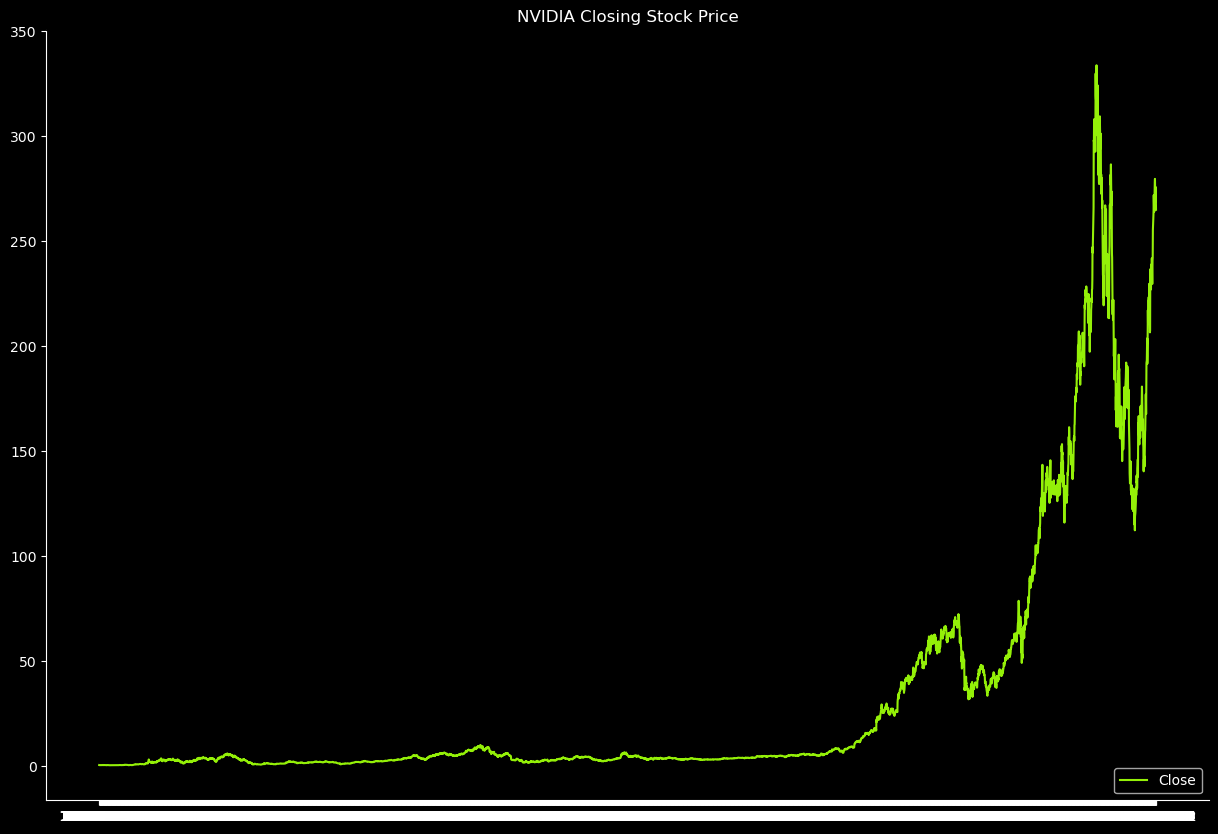

In [87]:
style()

plt.title('NVIDIA Closing Stock Price', color="white")
plt.plot(nvidia_viz.Date, nvidia_viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

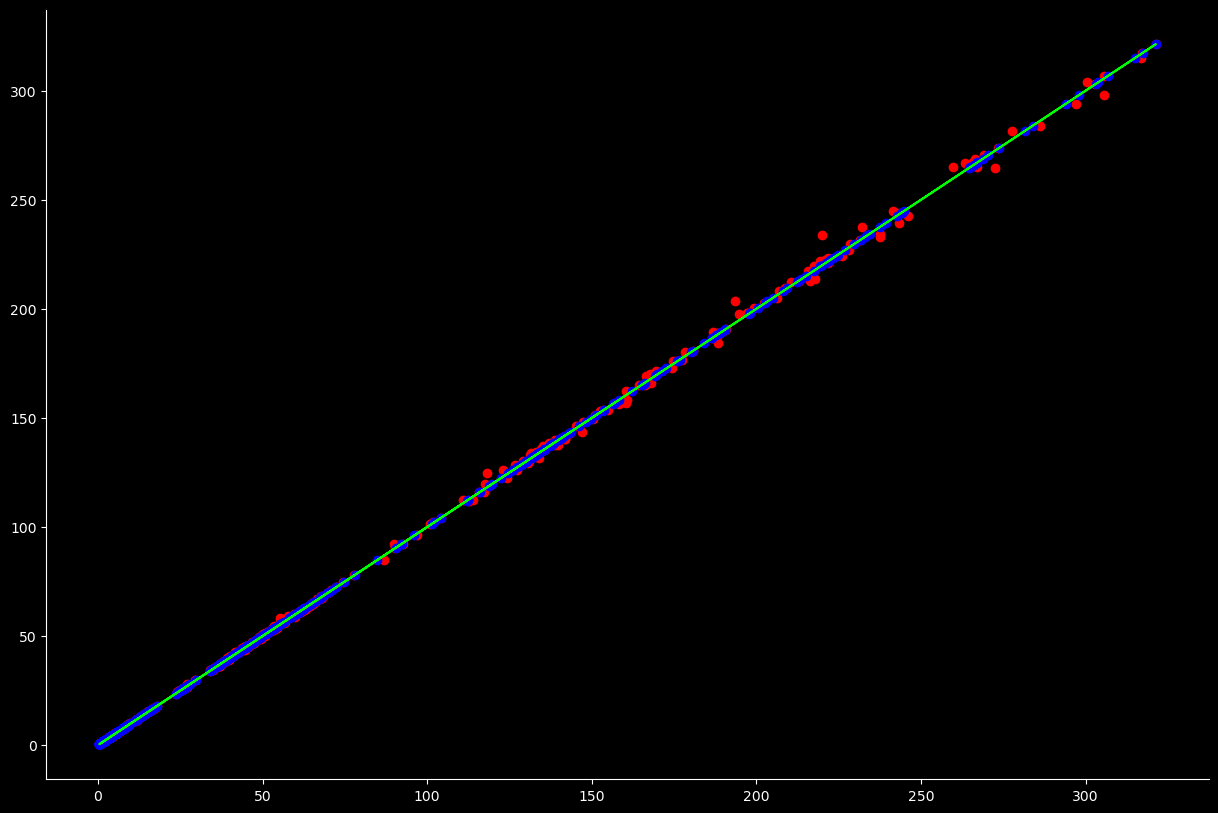

In [88]:
style()

plt.scatter(y_pred_nvidia, y_test_nvidia, color='red', marker='o')
plt.scatter(y_test_nvidia, y_test_nvidia, color='blue')
plt.plot(y_test_nvidia, y_test_nvidia, color='lime')

In [89]:
nvidia_test_pred['Close_Prediction'] = y_pred_nvidia
nvidia_test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
263,2000-02-08,0.812500,0.859375,0.791667,0.830729,0.762274,46881600,0.831891
1430,2004-10-01,1.215833,1.266667,1.210000,1.260000,1.156171,59041200,1.251758
3431,2012-09-11,3.317500,3.412500,3.305000,3.360000,3.083124,38280800,3.387455
5854,2022-04-28,189.669998,200.369995,184.899994,197.820007,197.635300,57032700,194.673415
124,1999-07-22,0.421875,0.421875,0.401042,0.404948,0.371579,21326400,0.402497
...,...,...,...,...,...,...,...,...
3439,2012-09-21,3.407500,3.437500,3.395000,3.417500,3.135885,34013600,3.424432
3283,2012-02-09,4.127500,4.150000,4.067500,4.075000,3.739206,56194400,4.098862
1511,2005-01-27,1.770833,1.917500,1.760000,1.909167,1.751845,100291200,1.881474
4860,2018-05-17,61.520000,62.875000,61.357498,61.927502,61.330379,51978400,62.586824


In [90]:
nvidia_test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,1219.0,30.936415,60.343605,0.352865,2.643333,4.415000,25.906250,321.260010
Close_Prediction,1219.0,30.907728,60.278027,0.350050,2.644710,4.415389,25.770714,321.376358


### NVIDIA Actual Close Price vs Predicted Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13483357"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Share Price of All the Companies

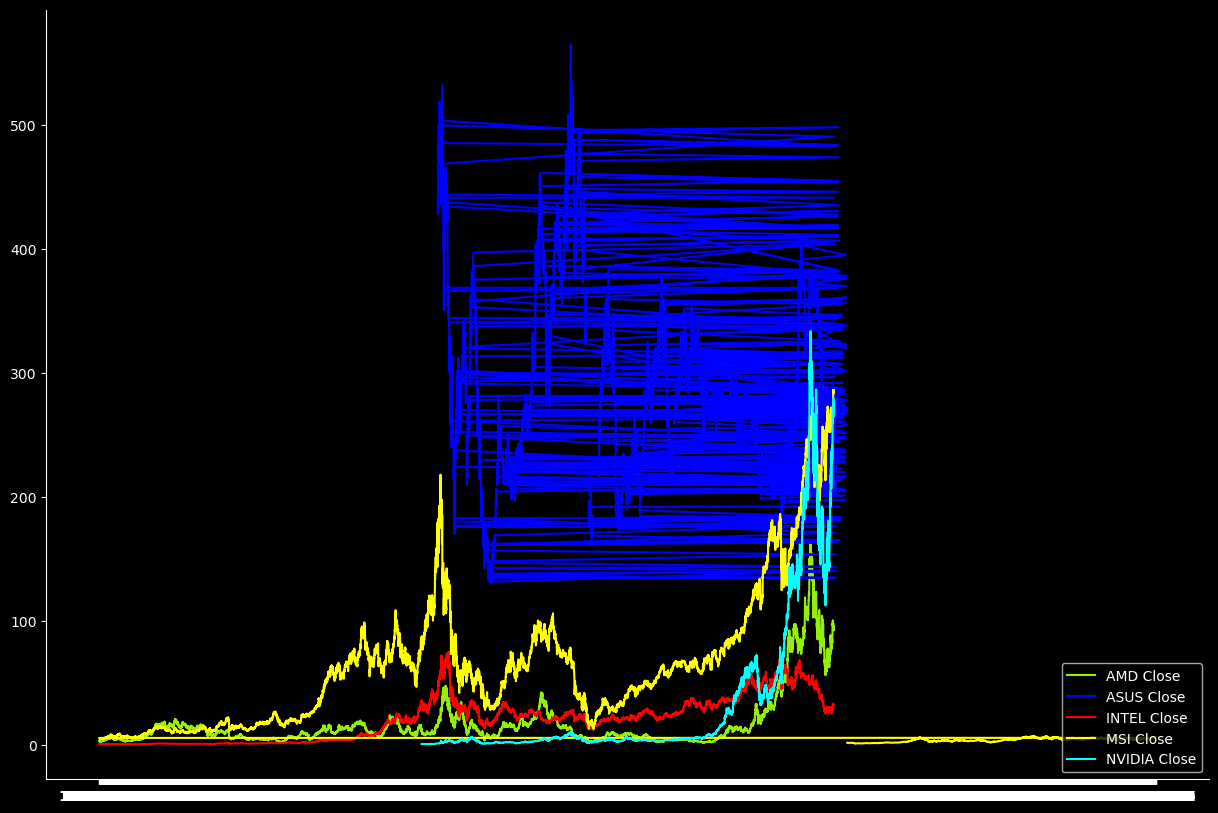

In [91]:
style()

plt.plot(amd_viz.Date, amd_viz.Close, color="#94F008")
plt.plot(asus_viz.Date, asus_viz.Close, color="blue")
plt.plot(intel_viz.Date, intel_viz.Close, color="red")
plt.plot(msi_viz.Date, msi_viz.Close, color="yellow")
plt.plot(nvidia_viz.Date, nvidia_viz.Close, color="cyan")
plt.legend(["AMD Close", "ASUS Close", "INTEL Close", "MSI Close", "NVIDIA Close"], loc ="lower right", facecolor='black', labelcolor='white')

## All Company's Actual Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13483394"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

## All Comapny's Predicted Close Price

<div class="flourish-embed flourish-chart" data-src="visualisation/13483580"><script src="https://public.flourish.studio/resources/embed.js"></script></div>

# Saving the Data as CSV

## AMD

In [92]:
amd_test_pred['Date'] = pd.to_datetime(amd_test_pred['Date'],format='%Y-%m-%d')

In [93]:
output = pd.DataFrame(amd_test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
1980-03-31,2.541667,2.724958
1980-04-01,NaN,NaN
1980-04-02,NaN,NaN
1980-04-03,NaN,NaN
1980-04-04,NaN,NaN
...,...,...
2023-04-08,NaN,NaN
2023-04-09,NaN,NaN
2023-04-10,NaN,NaN


In [94]:
output.to_csv('AMD_Close_Prediction.csv', index=True)
print("AMD CSV successfully saved!")

AMD CSV successfully saved!


## ASUS

In [95]:
asus_test_pred['Date'] = pd.to_datetime(asus_test_pred['Date'],format='%Y-%m-%d')

In [96]:
output = pd.DataFrame(asus_test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
2000-01-11,443.939606,445.512091
2000-01-12,NaN,NaN
2000-01-13,NaN,NaN
2000-01-14,NaN,NaN
2000-01-15,NaN,NaN
...,...,...
2023-03-11,NaN,NaN
2023-03-12,NaN,NaN
2023-03-13,NaN,NaN


In [97]:
output.to_csv('ASUS_Close_Prediction.csv', index=True)
print("ASUS CSV successfully saved!")

ASUS CSV successfully saved!


## INTEL

In [98]:
intel_test_pred['Date'] = pd.to_datetime(intel_test_pred['Date'],format='%Y-%m-%d')

In [99]:
output = pd.DataFrame(intel_test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
1980-03-31,0.321615,0.324243
1980-04-01,NaN,NaN
1980-04-02,NaN,NaN
1980-04-03,NaN,NaN
1980-04-04,NaN,NaN
...,...,...
2023-04-08,NaN,NaN
2023-04-09,NaN,NaN
2023-04-10,NaN,NaN


In [100]:
output.to_csv('INTEL_Close_Prediction.csv', index=True)
print("INTEL CSV successfully saved!")

INTEL CSV successfully saved!


## MSI

In [101]:
msi_test_pred['Date'] = pd.to_datetime(msi_test_pred['Date'],format='%Y-%m-%d')

In [102]:
output = pd.DataFrame(msi_test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
1962-01-15,1.461453,1.397760
1962-01-16,1.457265,1.418067
1962-01-17,NaN,NaN
1962-01-18,NaN,NaN
1962-01-19,1.398639,1.364603
...,...,...
2023-04-08,NaN,NaN
2023-04-09,NaN,NaN
2023-04-10,NaN,NaN


In [103]:
output.to_csv('MSI_Close_Prediction.csv', index=True)
print("MSI CSV successfully saved!")

MSI CSV successfully saved!


## NVIDIA

In [104]:
nvidia_test_pred['Date'] = pd.to_datetime(nvidia_test_pred['Date'],format='%Y-%m-%d')

In [105]:
output = pd.DataFrame(nvidia_test_pred[['Date', 'Close', 'Close_Prediction']])
output = output.reset_index()
output = output.drop('index',axis=1)
output.set_index('Date', inplace=True)
output =  output.asfreq('D')
output

,Close,Close_Prediction
Date,,
1999-01-26,0.417969,0.424216
1999-01-27,NaN,NaN
1999-01-28,NaN,NaN
1999-01-29,0.395833,0.398121
1999-01-30,NaN,NaN
...,...,...
2023-04-08,NaN,NaN
2023-04-09,NaN,NaN
2023-04-10,NaN,NaN


In [106]:
output.to_csv('NVIDIA_Close_Prediction.csv', index=True)
print("NVIDIA CSV successfully saved!")

NVIDIA CSV successfully saved!


<br>
<p style="text-align:center; font-weight:800; font-size:18px"><em>Thank you For viewing this Notebook 😃, do upvote 🔼 if you like it and please feel free to provide any feedback.</em>
<p style="text-align:center"><img src="https://i.gifer.com/VzFD.gif" width="480" height="200"></p>